## Análisis y Visualizción - Mentoría

## Review de productos en Amazon

### Ulises Dascalakis

Mail : ulises.dasca@live.com.ar

### Alejandro Bernal

Mail : alejandro@alejandro.bio


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('data_review.csv')

### 1 Analizar la consistencia/inconsistencia de los datos.

In [9]:
### Sacando los campos de la tabla
list(dataset.columns.values)

['rating', 'title', 'review', 'target']

### La columna 'rating' : Representa datos categoricos del 1 al 5  y no contiene datos nulos

In [39]:
### Evaluando los datos de la columna rating
dataset['rating'].describe()

count    100000.000000
mean          3.975310
std           1.496717
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [38]:
### Evaluando si hay datos nulos
dataset['rating'].isnull().sum()

0

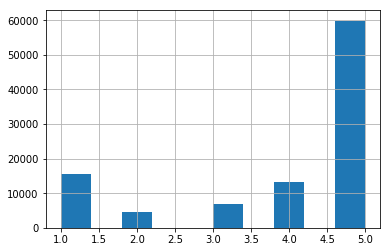

In [41]:
### Evaluando distribución de datos
dataset['rating'].hist()

### La columna 'title' : Representa los titulos de la Review y solo tiene un dato vacio

In [24]:
### Evaluando los datos de la columna rating
dataset['title'].head()

0    .............Am I in Midgard anymore ?
1     Zip wax new formula is just horrible.
2                   Apatow's Depth Triumphs
3                               Dream of C.
4                           it doesnt suck.
Name: title, dtype: object

In [46]:
### Evaluando los datos de la columna rating
dataset['title'].describe()

count         99999
unique        87206
top       Excellent
freq            228
Name: title, dtype: object

In [44]:
### Evaluando si hay datos nulos
dataset['title'].isnull().sum()

1

### La columna 'review' : Representa a la descripción en si de la review y no contiene datos vacios

In [25]:
### Evaluando los datos de la columna review
dataset['review'].head()

0    I was so disappointed to find she has not writ...
1    I've been using zip wax for many years. It was...
2    I am a stand-up fanatic. I enjoy the alternati...
3    It is to bad such talented illustrations are i...
4    this product doesnt vaccum out the air I was d...
Name: review, dtype: object

In [47]:
### Evaluando los datos de la columna review
dataset['review'].describe()

count                                                100000
unique                                                99999
top       Very cheap and half the price then buying from...
freq                                                      2
Name: review, dtype: object

In [45]:
### Evaluando los datos de la columna review
dataset['review'].isnull().sum()

0

### La columna 'target' : Representa datos categoricos booleanos y 6775 contiene datos vacios

In [48]:
### Evaluando los datos de la columna review
dataset['target'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: target, dtype: float64

In [49]:
### Evaluando los datos de la columna review
dataset['target'].describe()

count    93225.000000
mean         0.785036
std          0.410799
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [50]:
### Evaluando los datos de la columna review
dataset['target'].isnull().sum()

6775

### 1.1 En caso de presentarse faltantes, que decisión tomaría para su tratamiento. ¿Porqué?

#### Se presentan faltantes en los campos

* Title : 1     faltante
* Target: 6775  faltantes

#### Sin embargo los faltantes mas relevantes son los del campo target

### Evaluando información de los datos faltantes

* Todo campo nulo en target tiene un valor de rating = 3
* Todo rating = 3 tiene un valor nulo en target
* un rating de 3 parece dar lugar a una división binaria en el dataset
* Contrastamos a las campos 'rating' y 'target' pues son los datos categoricos que pueden tener relación

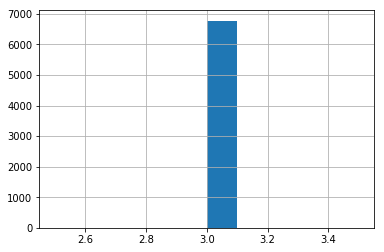

In [54]:
dataset[dataset['target'].isnull()]['rating'].hist()

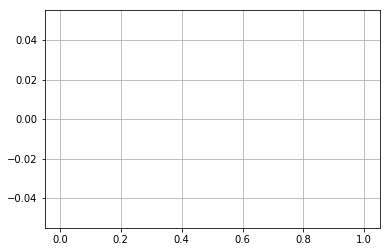

In [78]:
dataset[dataset['rating'] == 3]['target'].hist()

* Todo valor de target es 0 cuando el rating es menor a 3

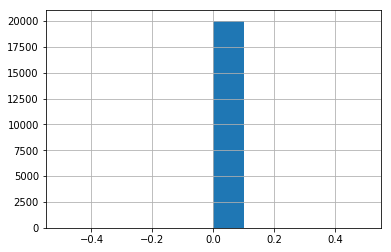

In [79]:
dataset[dataset['rating'] < 3]['target'].hist()

* Todo valor de target es 1 cuando el rating es mayor a 3

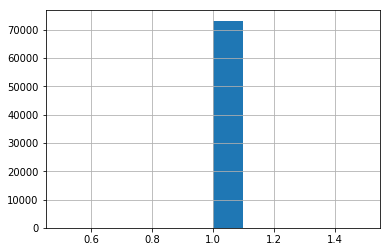

In [80]:
dataset[dataset['rating'] > 3]['target'].hist()

### Analizando al valor de rating para todo target diferente de nulo

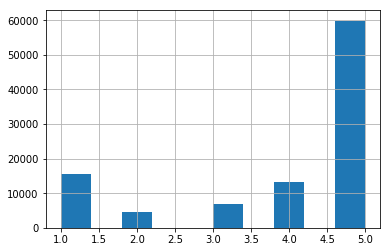

In [57]:
dataset[dataset['target'] != '']['rating'].hist()

In [61]:
dataset.corr()

,rating,target
rating,1.000000,0.966166
target,0.966166,1.000000
